# Classification

## Heart Disease

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
df = pd.read_csv(r'\Users\97254\Desktop\Heart Disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Dictionary Of The Various Features
**age** - age in years

**sex**-
    * 0 : female
    * 1 : male
**cp** - chest pain type
    * 0 : Typical angina: chest pain related decrease blood supply to the heart
    * 1 : Atypical angina: chest pain not related to heart
    * 2 : Non-anginal pain: typically esophageal spasms (non heart related)
    * 3 : Asymptomatic: chest pain not showing signs of disease
**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
**chol** - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern

**fbs** - (fasting blood sugar > 120 mg/dl)
    * 0 : false
    * 1 : true
    * '>126' mg/dL signals diabetes
**restecg** - resting electrocardiographic results
    * 0 : Nothing to note
    * 1 : ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
**thalach** - maximum heart rate achieved

**exang** - exercise induced angina
    * 0 : no
    * 1 : yes
**oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**slope** - the slope of the peak exercise ST segment
    * 0 : Upsloping: better heart rate with excercise (uncommon)
    * 1 : Flatsloping: minimal change (typical healthy heart)
    * 2 : Downslopins: signs of unhealthy heart
**ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
**thal** - thalium stress result
    * 0 : normal
    * 1 : fixed defect
    * 2 : reversable defect
**target** - have disease or not (= the predicted attribute)
    * 0 : no
    * 1 : yes

In [3]:
df.shape

(1025, 14)

There are 1025 subjects and 14 features in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are no NaN values in this dataset. We can see that the dataset is clean and ready to work with.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Vizualization

### How is the dataset divided? What is the percentage of the sick compared to the percentage of the healthy?

The number of patients with heart disease:  526
The number of patients without heart disease:  499


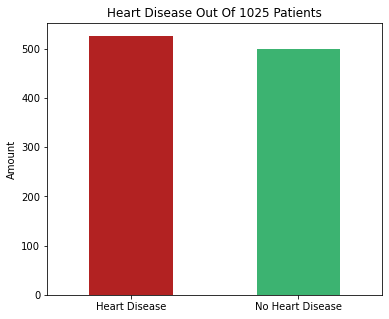

In [8]:
df.target.value_counts().plot(kind='bar',  color=['firebrick' , 'mediumseagreen'] , figsize=(6, 5));
plt.xticks([0, 1], ["Heart Disease", "No Heart Disease"], rotation=0);
plt.title("Heart Disease Out Of 1025 Patients")
plt.ylabel("Amount")

print("The number of patients with heart disease: ", len(df[df['target'] == 1]))
print("The number of patients without heart disease: ", len(df[df['target'] == 0]))

We can see that the dataset is evenly divided by sick subjects and healthy subjects.

Let's check the percentage of Males and females.

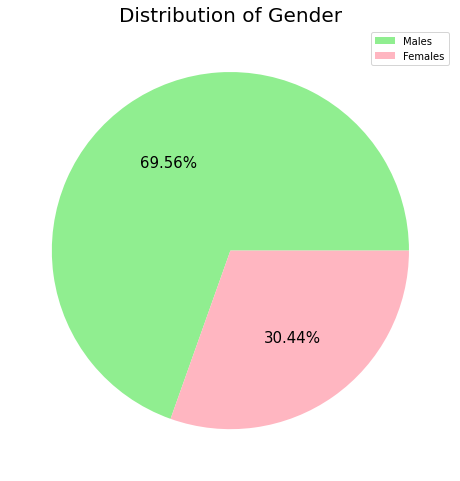

In [10]:
plt.subplots(figsize=(8, 9))
plt.pie(df['sex'].value_counts(), colors = ['lightgreen', 'lightpink'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('Distribution of Gender' , fontdict = {'fontsize' : 20})
plt.legend(["Males" , "Females"] , loc=1)

plt.show()

([<matplotlib.axis.XTick at 0x1fd780bddf0>,
 [Text(0, 0, 'No Heart Disease'), Text(0, 0, 'Heart Disease')])

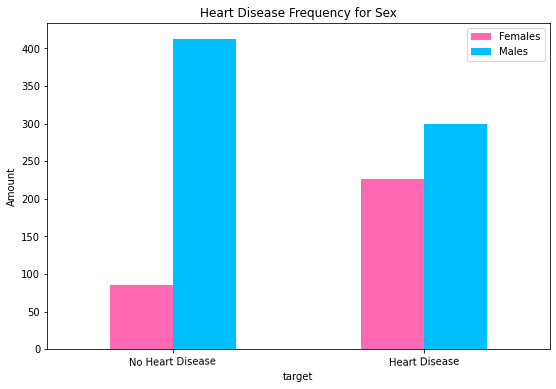

In [11]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(9, 6),
                                    color=['hotpink', 'deepskyblue'])
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount")
plt.legend(["Females", "Males"])
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"], rotation=1)

There are more men in the dataset. We can only assume that men suffer from heart disease more than women and so they are checked. <br> This asssuming can not explain why from all women it looks like about $\frac{3}{4}$ are sick and from all men most are actually healthy.

### what are the Ages of all subjects and how are they divided?

Text(0.5, 1.0, 'All Patients Ages Histograma')

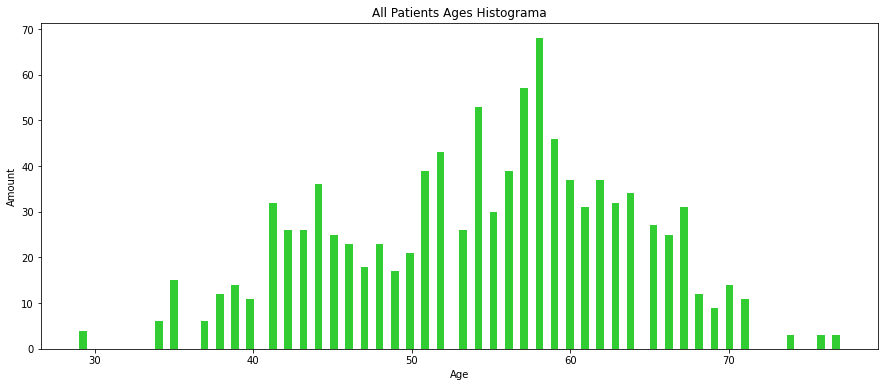

In [12]:
df.age.plot.hist(figsize=(15, 6), bins=100 , color = 'limegreen');
plt.ylabel("Amount")
plt.xlabel("Age")
plt.title("All Patients Ages Histograma")

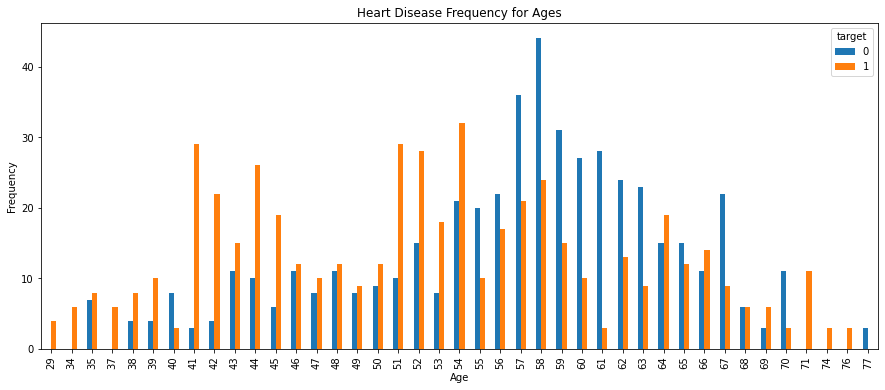

In [13]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see that under the age 35 and above the age 70 there is a loss of data and the data spreads to only one target. <br> Therefor we will consider these ages outliers and delete them from the dataset.

In [14]:
print("Number of patients under 35 years old: ", len(df.loc[df['age'] < 35]))
print("Number of patients over 70 years old: ", len (df.loc[df["age"] > 70]))

Number of patients under 35 years old:  10
Number of patients over 70 years old:  20


Over all we are deleting 30 subjects.

In [15]:
# Drop the outliers
under_35 = df[df['age']<35].index
over_70 = df[df['age']>70].index

df.drop(under_35, inplace=True)
df.drop(over_70, inplace=True)

# Check that the outliers have been removed
print("Number of subjects under 35 years old: ", len(df.loc[df['age'] < 35]))
print("Number of subjects over 70 years old: ", len (df.loc[df["age"] > 70]))

Number of subjects under 35 years old:  0
Number of subjects over 70 years old:  0


After cleaning the outliers, we'll look at the ages again.

Text(0.5, 1.0, 'All Patients Ages Histograma - After Cleaning')

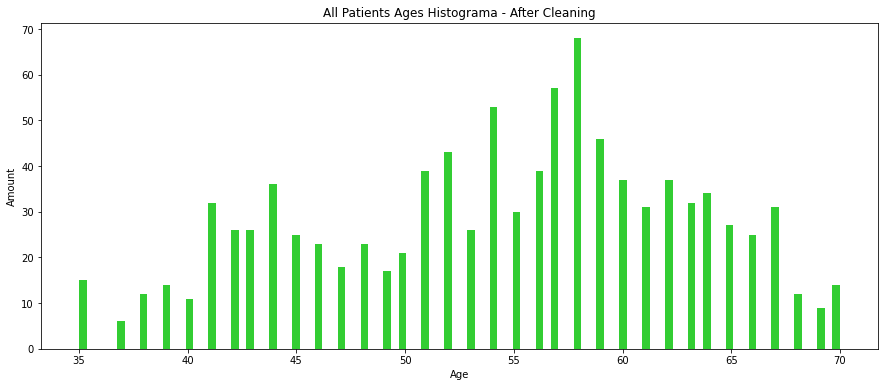

In [16]:
df.age.plot.hist(figsize=(15, 6), bins=100 , color = 'limegreen');
plt.ylabel("Amount")
plt.xlabel("Age")
plt.title("All Patients Ages Histograma - After Cleaning")

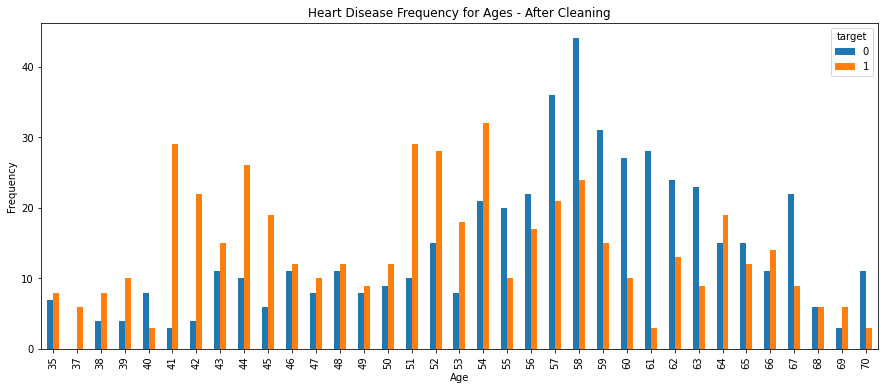

In [17]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Ages - After Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

([<matplotlib.axis.XTick at 0x1fd78262f70>,
 [Text(0, 0, 'Typical Angina'),
  Text(0, 0, 'Atypical Angina'),
  Text(0, 0, 'Non-Anginal'),
  Text(0, 0, 'Asymptomatic')])

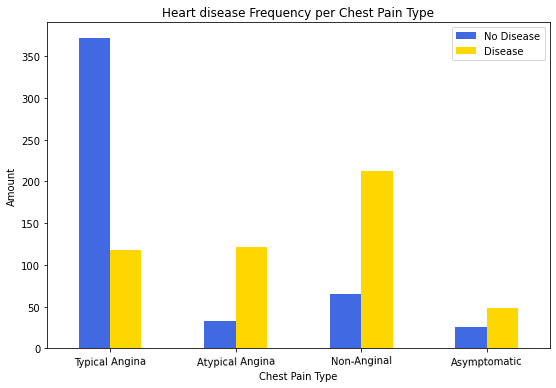

In [18]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(9, 6), color=['royalblue', 'gold'])
plt.title("Heart disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], rotation=1)

We can see that chest pain is not always related to heart disease, although we would think it is.<br>
Typical Angina does not show about heart disease, compared to a Non Anginal pain that is more related to heart disease.

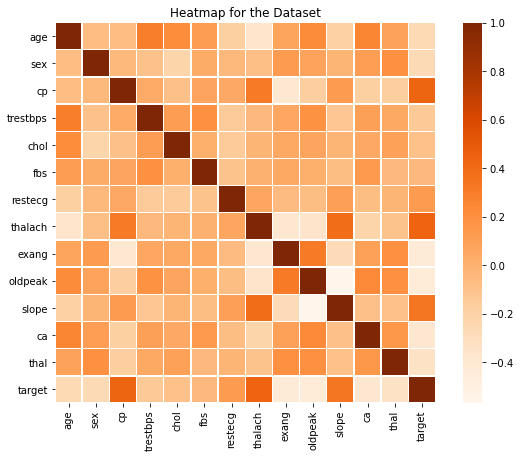

In [20]:
# making a heat map
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('Heatmap for the Dataset')
plt.show()

The above heat map is showing us the correlations amongst the different features of the dataset. <br> We can see that all of the features are very less correlated with each other. <br> This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

After understanding the dataset, <br> Since 'cp', 'thal', 'slope' and 'restecg' are categorical variables, we'll turn them into dummy variables.

In [21]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['restecg'], prefix = "restecg")

frames = [df, a, b, c , d]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope' , 'restecg'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,0,1,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,1,1,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,0,1,0,0,1,0,0,1,0


Now the dataset is perfectly prepared for modelling.